In [1]:
from scipy.stats import betabinom
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import itertools

In [2]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 9,
          'font.family' : 'sans'
          }
plt.rcParams.update(params) 
from tueplots import bundles, axes,figsizes, fonts, fontsizes
plt.rcParams.update(fontsizes.neurips2021()) 

In [3]:
years = np.load("data_fig2/years.npy")
n = np.load("data_fig2/num_movies.npy")
lst = np.load("data_fig2/flop_rate.npy")

hypotest_data = np.load("data_fig2/hypotest_data.npy")

n_1 = hypotest_data[0]
m_0 = hypotest_data[1]
n_0 = hypotest_data[2]
m_2020 = hypotest_data[3]


p = betabinom(n_1, m_0 + 1, n_0 - m_0 + 1)

mm_1 = np.arange(n_1)

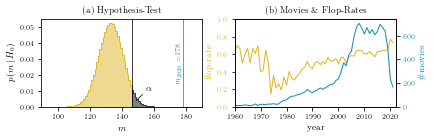

In [6]:
size = set_size(397.48499, fraction=1, subplots=(1, 2))

color1 = "#deb522"
color2 = "#128bb5"
linewidth = 1

fig, ax = plt.subplots(1,2, figsize=size)
fig.tight_layout()
ax02 = ax[1].twinx()
ax02.plot(years, n, color=color2,linewidth=linewidth)
ax[1].set_title("(b) Movies \& Flop-Rates")
ax[1].plot(years, lst, color=color1,linewidth=linewidth)


ax[1].set_ylim(0,1.0)
ax02.set_ylim(0)
ax02.set_xlim(1960,2022)

ax02.set_ylabel("\#movies", color=color2)
ax[1].set_ylabel("flop-rate", color=color1)
ax[1].set_xlabel('year')

ax[1].tick_params(axis='y', labelcolor=color1)
ax02.tick_params(axis='y', labelcolor=color2)

mm_1_nr = mm_1[mm_1 <= betabinom.ppf(0.95, n_1, m_0 + 1, n_0 - m_0 + 1)]
ax[0].step(mm_1_nr,  p.pmf(mm_1_nr), color="#deb522",linewidth=0.75)
ax[0].fill_between(mm_1_nr, 0, p.pmf(mm_1_nr), step="pre", color="#deb522", alpha=0.5)

mm_1_nr = mm_1[mm_1 >= betabinom.ppf(0.95, n_1, m_0 + 1, n_0 - m_0 + 1)]
ax[0].step(mm_1_nr,  p.pmf(mm_1_nr), color="black", alpha=0.5,linewidth=0.75)
ax[0].fill_between(mm_1_nr, 0, p.pmf(mm_1_nr), step="pre", color="black", alpha=0.5)
ax[0].axvline(min(mm_1_nr), color="black",linestyle="-",linewidth=0.75)
#ax[0].fill_between(mm_1, 0, 1, where=mm_1 >= betabinom.ppf(0.95, n_1, m_0 + 1, n_0 - m_0 + 1), alpha=0.12, color="black", zorder=-1)

ax[0].set_title("(a) Hypothesis-Test")
ax[0].annotate(r"$\alpha$", xy=(148, 0.003),
             xycoords='data',
             xytext=(155, 0.01),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-',
                             color='black',
                             lw=0.75,
                             ls='-'))



ax[0].axvline(m_2020, color="#128bb5",linestyle="-",linewidth=0.75)
ax[0].text(m_2020-3, 0.027, '$m_{2020}=$'+str(m_2020), fontsize=7, va='center', ha='center', rotation=-270,color=color2)


ax[0].set_ylabel("$p(m \hspace{0.25em}| \hspace{0.25em}H_0)$")
ax[0].set_xlabel("$m$")
ax[0].set_xlim(90, 140+50)
ax[0].set_ylim(0, 0.055)
plt.savefig("fig2.pdf", bbox_inches='tight', pad_inches=0., transparent=True)
plt.savefig("fig2.png", bbox_inches='tight', pad_inches=0., facecolor='white', dpi=1000)
plt.show()